In [1]:
import cv2 

In [2]:
import matplotlib.pyplot as plt

In [3]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [4]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [5]:
classLabels = [] ## empty list of python
file_name = 'Labels.txt'
with open(file_name,'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')

In [6]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [7]:
print(len(classLabels))

80


In [8]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5) ## 255/2 = 127.5
model.setInputMean((127.5,127.5,127.5)) ## mobilenet => [-1,1]
model.setInputSwapRB(True)

<dnn_Model 0ADD81E0>

# read an image

In [9]:
img = cv2.imread('man_with_car.jfif')

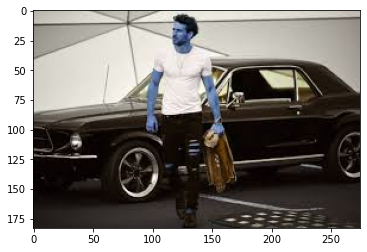

In [10]:
plt.imshow(img)

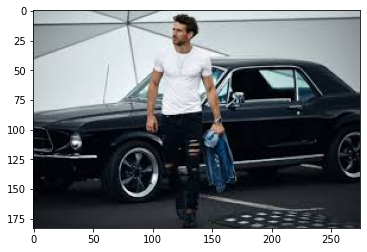

In [11]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [12]:
ClassIndex, confidence, bbox = model.detect(img,confThreshold=0.5)

In [13]:
print(ClassIndex)

[[1]
 [3]]


In [14]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img,boxes,(255,0,0), 2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale,color=(0, 255, 0), thickness=3 )

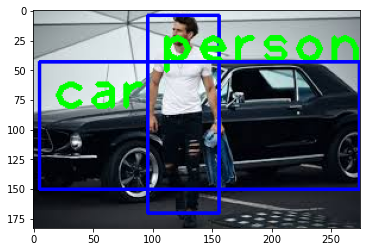

In [15]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
cap = cv2.VideoCapture("pexels-tim-samuel-5834557.mp4")

# Check if the video is opened  correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
    
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame = cap.read()
    
    ClassIndex, confidece, bbox = model.detect(frame,confThreshold=0.55)
    
    print(ClassIndex)
    if (len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if (ClassInd<=80):
                cv2.rectangle(frame,boxes,(255, 0, 0), 2 )
                cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale,color=(0, 255, 0), thickness=3 )
                
    cv2.imshow('Object Detection Project',frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyALLWindows()

[[1]
 [3]
 [1]
 [1]]
[[1]
 [3]
 [1]
 [3]
 [1]
 [1]]
[[1]
 [3]
 [1]
 [1]
 [3]]
[[1]
 [3]
 [1]
 [1]
 [1]
 [3]
 [1]]
[[1]
 [1]
 [3]
 [1]
 [1]
 [3]]
[[1]
 [3]
 [1]
 [1]
 [1]]
[[3]
 [1]
 [1]
 [1]
 [1]]
[[3]
 [1]
 [1]
 [1]
 [1]
 [1]
 [3]]
[[1]
 [3]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [3]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [3]
 [3]]
[[1]
 [1]
 [1]
 [3]
 [3]
 [1]]
[[1]
 [1]
 [3]
 [3]]
[[1]
 [3]
 [1]
 [3]
 [3]
 [3]]
[[3]
 [1]
 [1]
 [3]
 [3]]
[[1]
 [3]
 [1]
 [3]
 [3]]
[[3]
 [1]
 [1]
 [3]
 [3]]
[[3]
 [1]
 [3]
 [1]
 [1]]
[[3]
 [1]
 [3]
 [1]]
[[3]
 [1]
 [3]
 [1]]
[[3]
 [1]
 [3]
 [3]
 [1]
 [1]]
[[3]
 [1]
 [1]
 [3]]
[[1]
 [3]
 [3]
 [3]
 [1]
 [1]]
[[3]
 [3]
 [1]
 [1]
 [3]]
[[3]
 [3]
 [1]
 [1]
 [1]
 [3]]
[[3]
 [3]
 [1]
 [1]
 [1]
 [3]]
[[3]
 [3]
 [1]
 [1]
 [1]
 [3]]
[[3]
 [3]
 [1]
 [1]
 [1]]
[[3]
 [3]
 [1]
 [1]
 [1]]
[[3]
 [3]
 [1]
 [1]
 [1]]
[[3]
 [3]
 [1]
 [1]
 [1]]
[[3]
 [3]
 [1]
 [1]
 [1]]
[[3]
 [1]
 [3]
 [1]
 [1]]
[[3]
 [3]
 [1]
 [1]
 [1]]
[[1]
 [3]
 [3]
 [1]
 [1]]
[[1]
 [3]
 [1]
 [1]
 [3]]
[[3]
 [1]
 [3]